## 문제 정의 : 경제적인 요소를 고려하는 사람들을 위해 연비가 높은 차량을 선정할 때 원하는 연비의 차량에 대해 필요한 대략적인 차량가격을 예측하고자 한다.

### 데이터셋 불러오기

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
font_list = [font.name for font in fm.fontManager.ttflist]
plt.rcParams[ 'font.family' ] = 'NanumBarunGothic'
plt.rcParams[ 'font.size' ] = 25

In [3]:
df = pd.read_csv( '자동차 에너지소비효율등급 인증 현황_190903..csv' )
df

,모델명,제조사,유종,배기량,변속형식,복합연비,등급,CO2배출량
0,토요타 Prius AWD,토요타,휘발유,1798,무단변속,20.9,1등급,74.0
1,"코나 1.6GDI 하이브리드 (18"" 타이어)",현대,휘발유,1580,자동6,17.4,1등급,92.0
2,"코나 1.6GDI 하이브리드 (16"" 타이어)",현대,휘발유,1580,자동6,19.3,1등급,82.0
3,"코나 1.6디젤 2WD (16"" 타이어)",현대,경유,1598,자동7,17.5,1등급,105.0
4,"코나 1.6디젤 2WD (17"" 타이어)",현대,경유,1598,자동7,17.3,1등급,107.0
...,...,...,...,...,...,...,...,...
2082,넥쏘 수소전기차(19인치타이어),현대,수소,0,없음,93.7,FCEV,0.0
2083,Danigo(다니고),대창모터스,전기,0,없음,5.3,저속,0.0
2084,Change,AD 모터스,전기,0,없음,4.3,저속,0.0
2085,코나 전기자동차 (도심형),현대,전기,0,없음,5.8,고속,0.0


### 제조사 별 자동차 모델 수

In [20]:
# 제조사 별 모델 수 세는 데이터프레임 생성
brand = df.groupby( '제조사' )[ [ '제조사' ] ].count()
brand.rename( columns = { '제조사' : '모델 수' }, inplace = True )
brand

,모델 수
제조사,
AD 모터스,1
BMW,191
DFSK,4
GM,28
MINI,27
PSA,8
기아,409
닛산,30
대창모터스,1


In [22]:
# sort_values 이용해 내림차순으로 정렬
brand = brand.sort_values( by = [ '모델 수' ], axis = 0, ascending = False )
brand

,모델 수
제조사,
기아,409
현대,394
BMW,191
벤츠,163
포르쉐,131
쌍용,74
재규어,71
크라이슬러,69
랜드로버,66


In [25]:
# head 이용해 10대 이상의 제조사만 뽑은 데이터프레임 생성
brand1 = brand.head( 27 )
brand1

,모델 수
제조사,
기아,409
현대,394
BMW,191
벤츠,163
포르쉐,131
쌍용,74
재규어,71
크라이슬러,69
랜드로버,66


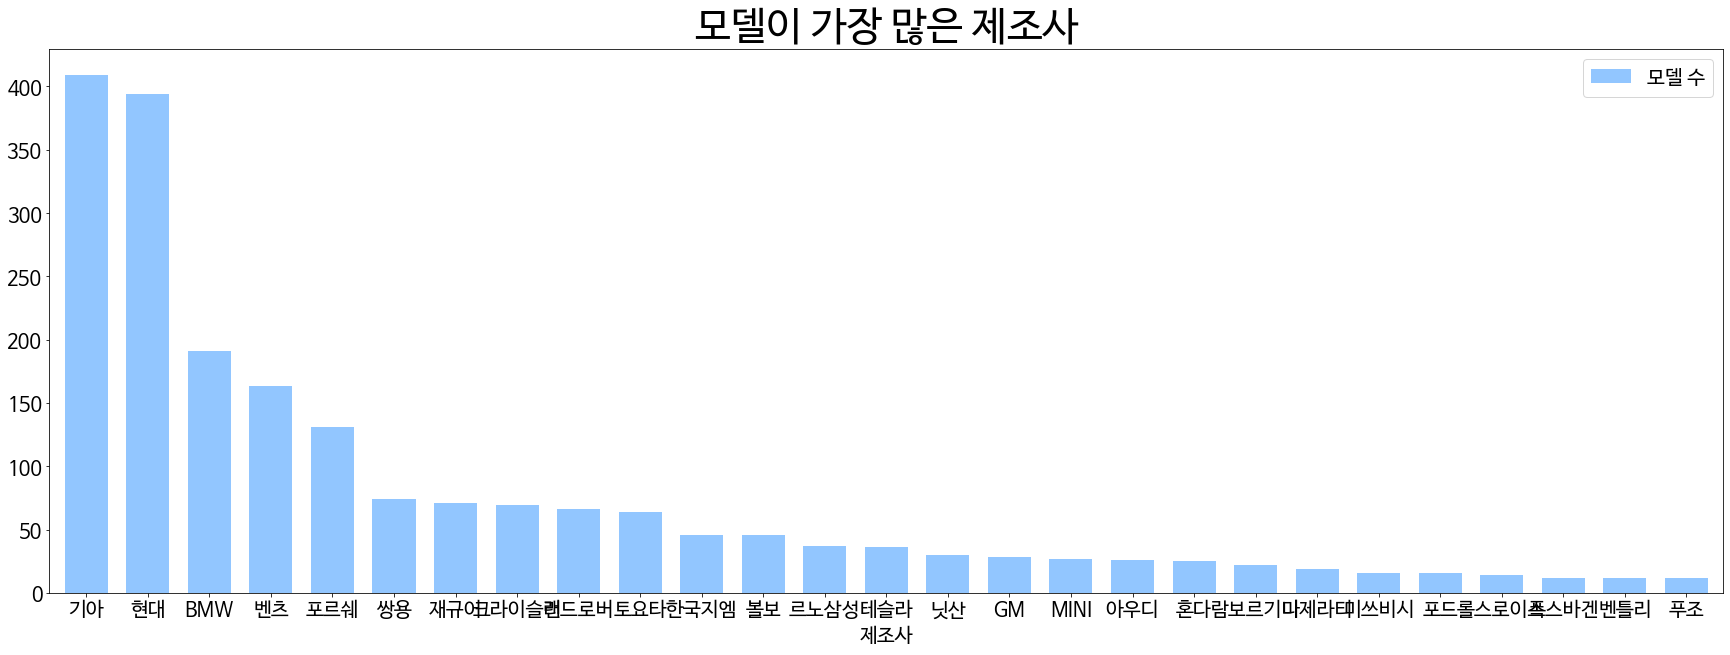

In [31]:
# 막대그래프로 시각화
brand1.plot( kind = 'bar', figsize = ( 30, 10 ), width = 0.7 )
plt.title( '모델이 가장 많은 제조사', size = 40 )
plt.xticks( rotation = 'horizontal' )
plt.show()

In [27]:
# TOP 5 제조사 데이터프레임 생성
brand2 = brand.head( 5 )
brand2

,모델 수
제조사,
기아,409
현대,394
BMW,191
벤츠,163
포르쉐,131


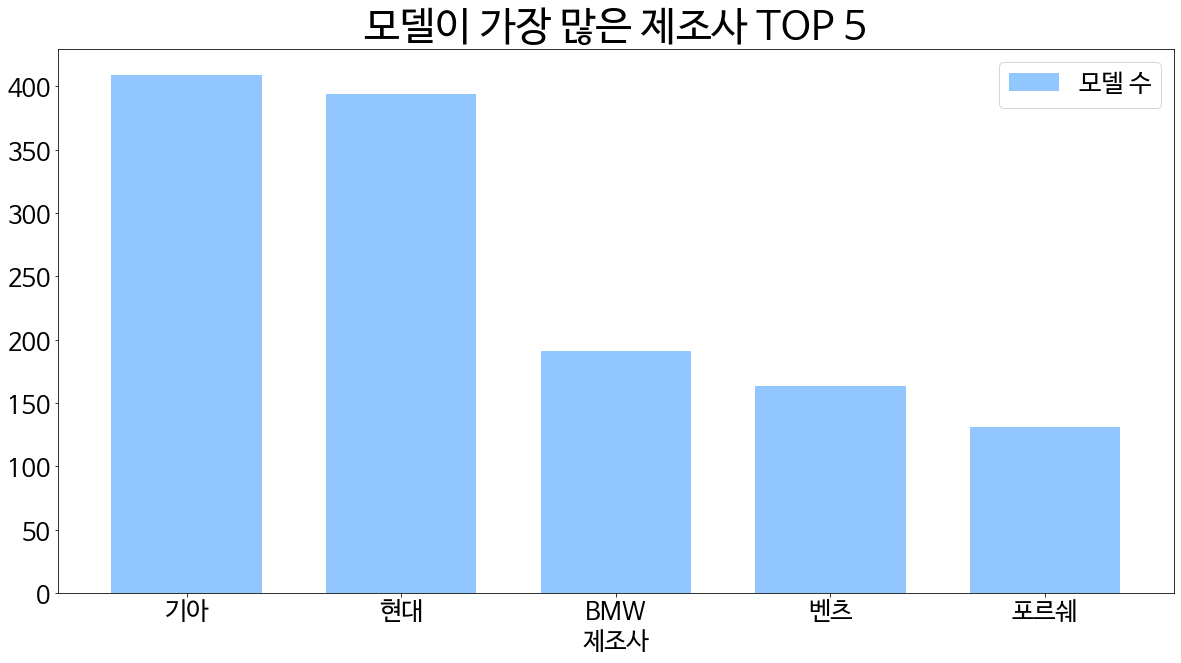

In [34]:
# 막대그래프로 시각화
plt.style.use( 'seaborn-pastel' )
brand2.plot( kind = 'bar', figsize = ( 20, 10 ), width = 0.7 )
plt.title( '모델이 가장 많은 제조사 TOP 5', size = 40 )
plt.xticks( rotation = 'horizontal' )
plt.show()

국내 제조사인 기아와 현대가 가장 많은 자동차 모델을 판매 중인것으로 나타났고 그 뒤로 외국 제조사인 BMW, 벤츠, 포르쉐 순으로 판매 중인 자동차 모델이 많은 것으로 나타났다. 

### 배기량 박스 그래프

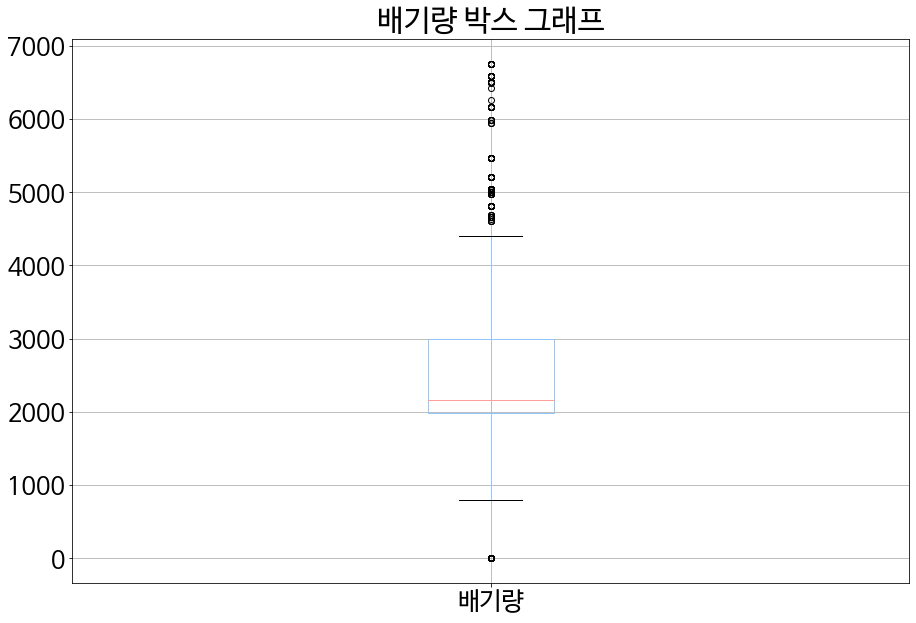

In [121]:
plt.figure( figsize = ( 15, 10 ) )
boxplot = df.boxplot( column = [ '배기량' ] )
plt.title( '배기량 박스 그래프', size = 30 )
plt.show()

0 값은 전기 / 수소 차

### 가장 배기량이 큰 모델

In [119]:
# 배기량 순으로 내림차순 정렬
ccm = df.sort_values( by = [ '배기량' ], axis = 0, ascending = False )
ccm.head( 20 )

,모델명,제조사,유종,배기량,변속형식,복합연비,등급,CO2배출량,분류
1719,Mulsanne Speed,벤틀리,휘발유,6752,자동8,5.6,5등급,313.0,경차
1737,Mulsanne,벤틀리,휘발유,6752,자동8,5.6,5등급,313.0,경차
1488,Rolls Royce Phantom EWB,롤스로이스,휘발유,6749,자동8,5.8,5등급,310.0,경차
1492,Rolls Royce Phantom EWB,롤스로이스,휘발유,6749,자동8,5.8,5등급,310.0,경차
1489,Rolls Royce Phantom,롤스로이스,휘발유,6749,자동8,5.8,5등급,310.0,경차
1483,Rolls Royce Phantom,롤스로이스,휘발유,6749,자동8,5.8,5등급,310.0,경차
1407,Rolls-Royce Cullinan,롤스로이스,휘발유,6749,자동8,5.6,5등급,319.0,경차
1377,Rolls-Royce Cullinan,롤스로이스,휘발유,6749,자동8,5.6,5등급,319.0,경차
1659,BMW M760Li xDrive,BMW,휘발유,6592,자동8,6.6,5등급,274.0,경차
1658,Rolls-Royce Wraith Coupe,롤스로이스,휘발유,6592,자동8,6.0,5등급,301.0,경차


벤틀리 / 롤스로이스 / BMW / 람보르기니 등의 자동차 모델들이 가장 배기량이 높은 것으로 나타났다.

### 가장 배기량이 낮은 모델

In [69]:
ccm.tail( 10 )

,모델명,제조사,유종,배기량,변속형식,복합연비,등급,CO2배출량
2037,Model X P100D,테슬라,전기,0,없음,3.1,고속,0.0
2029,Model X 75D,테슬라,전기,0,없음,4.1,고속,0.0
2036,Model X P100D,테슬라,전기,0,없음,3.1,고속,0.0
2035,Model X P100D,테슬라,전기,0,없음,3.1,고속,0.0
2034,BMW i3 120Ah,BMW,전기,0,없음,5.6,고속,0.0
2033,재규어 I-PACE EV400,재규어,전기,0,없음,3.5,고속,0.0
2032,LEAF,닛산,전기,0,없음,5.1,고속,0.0
2031,Model X 75D,테슬라,전기,0,없음,4.1,고속,0.0
2030,Model X 75D,테슬라,전기,0,없음,4.1,고속,0.0
2086,아이오닉 전기차 (18MY),현대,전기,0,없음,6.3,고속,0.0


#### 배기량이 낮은 모델은 전기차일 수 밖에 없기 때문에 유종 별 배기량 모델 순위를 구해본다.

In [70]:
df.유종.unique()

array(['휘발유', '경유', 'LPG', '수소', '전기+휘발유', '전기'], dtype=object)

#### 휘발유 사용 자동차의 순위

In [75]:
# 휘발유를 사용하는 모델의 배기량 순위 데이터프레임 생성
dfo = df[ df[ '유종' ] == '휘발유' ]
dfo

,모델명,제조사,유종,배기량,변속형식,복합연비,등급,CO2배출량
0,토요타 Prius AWD,토요타,휘발유,1798,무단변속,20.9,1등급,74.0
1,"코나 1.6GDI 하이브리드 (18"" 타이어)",현대,휘발유,1580,자동6,17.4,1등급,92.0
2,"코나 1.6GDI 하이브리드 (16"" 타이어)",현대,휘발유,1580,자동6,19.3,1등급,82.0
6,"K7 2.4하이브리드 (PE/17""타이어)",기아,휘발유,2359,자동6,16.2,1등급,97.0
7,쏘나타(DN8) 2.0GDI 하이브리드_17인치타이어,현대,휘발유,1999,자동6,19.1,1등급,83.0
...,...,...,...,...,...,...,...,...
2004,레이 1.0TCI (2015년형),기아,휘발유,998,무단변속,13.2,경형,131.0
2007,모닝 1.0가솔린 밴형(2015년형),기아,휘발유,998,자동4,15.2,경형,112.0
2008,레이 1.0가솔린 밴형 (2015년형),기아,휘발유,998,자동4,13.5,경형,128.0
2009,모닝 1.0가솔린 밴형 (2015년형),기아,휘발유,998,수동5,16.2,경형,104.0


In [77]:
# 휘발유를 사용하는 모델 중 배기량이 높은 TOP 10
dfo.sort_values( by = [ '배기량' ], axis = 0, ascending = False ).head( 10 )

,모델명,제조사,유종,배기량,변속형식,복합연비,등급,CO2배출량
1719,Mulsanne Speed,벤틀리,휘발유,6752,자동8,5.6,5등급,313.0
1737,Mulsanne,벤틀리,휘발유,6752,자동8,5.6,5등급,313.0
1483,Rolls Royce Phantom,롤스로이스,휘발유,6749,자동8,5.8,5등급,310.0
1492,Rolls Royce Phantom EWB,롤스로이스,휘발유,6749,자동8,5.8,5등급,310.0
1407,Rolls-Royce Cullinan,롤스로이스,휘발유,6749,자동8,5.6,5등급,319.0
1489,Rolls Royce Phantom,롤스로이스,휘발유,6749,자동8,5.8,5등급,310.0
1488,Rolls Royce Phantom EWB,롤스로이스,휘발유,6749,자동8,5.8,5등급,310.0
1377,Rolls-Royce Cullinan,롤스로이스,휘발유,6749,자동8,5.6,5등급,319.0
1636,Rolls-Royce Ghost SWB,롤스로이스,휘발유,6592,자동8,5.8,5등급,311.0
1638,Rolls-Royce Ghost SWB Black Badge,롤스로이스,휘발유,6592,자동8,5.7,5등급,317.0


벤틀리 사의 Mulsanne Speed와 Mulsanne 모델이 6752로 가장 높은 배기량을 가진 자동차 모델이다.

In [78]:
# 휘발유를 사용하는 모델 중 배기량이 낮은 TOP 10
dfo.sort_values( by = [ '배기량' ], axis = 0, ascending = False ).tail( 10 )

,모델명,제조사,유종,배기량,변속형식,복합연비,등급,CO2배출량
1990,모닝(JA) 1.0가솔린 (16인치 타이어) (15),기아,휘발유,998,자동4,14.7,경형,111.0
1969,"레이 1.0가솔린 밴형 (PE, 14인치 타이어)",기아,휘발유,998,자동4,13.0,경형,127.0
1988,모닝(JA) 1.0가솔린_밴형 (15),기아,휘발유,998,수동5,16.0,경형,101.0
1987,모닝(JA) 1.0가솔린_밴형 (16인치 타이어) (15),기아,휘발유,998,수동5,15.3,경형,106.0
1986,모닝(JA) 1.0가솔린_밴형 (16인치 타이어) (15),기아,휘발유,998,자동4,14.7,경형,111.0
1985,모닝(JA) 1.0가솔린_밴형 (15),기아,휘발유,998,자동4,15.4,경형,106.0
1984,모닝(JA) 1.0T-GDI_16인치 (15),기아,휘발유,998,자동4,12.2,경형,136.0
1982,모닝(JA) 1.0T-GDI_14인치 (15),기아,휘발유,998,자동4,13.0,경형,127.0
1974,레이 1.0가솔린 (15),기아,휘발유,998,자동4,12.7,경형,129.0
2010,모닝 1.0가솔린 (2015년형),기아,휘발유,998,수동5,16.2,경형,104.0


In [123]:
# 같은 배기량의 모델이 많아 하위 40까지 보기
dfo.sort_values( by = [ '배기량' ], axis = 0, ascending = True ).head( 40 )

,모델명,제조사,유종,배기량,변속형식,복합연비,등급,CO2배출량
2010,모닝 1.0가솔린 (2015년형),기아,휘발유,998,수동5,16.2,경형,104.0
1990,모닝(JA) 1.0가솔린 (16인치 타이어) (15),기아,휘발유,998,자동4,14.7,경형,111.0
1988,모닝(JA) 1.0가솔린_밴형 (15),기아,휘발유,998,수동5,16.0,경형,101.0
1987,모닝(JA) 1.0가솔린_밴형 (16인치 타이어) (15),기아,휘발유,998,수동5,15.3,경형,106.0
1986,모닝(JA) 1.0가솔린_밴형 (16인치 타이어) (15),기아,휘발유,998,자동4,14.7,경형,111.0
1985,모닝(JA) 1.0가솔린_밴형 (15),기아,휘발유,998,자동4,15.4,경형,106.0
1984,모닝(JA) 1.0T-GDI_16인치 (15),기아,휘발유,998,자동4,12.2,경형,136.0
1991,모닝(JA) 1.0가솔린 (15),기아,휘발유,998,수동5,16.0,경형,101.0
1982,모닝(JA) 1.0T-GDI_14인치 (15),기아,휘발유,998,자동4,13.0,경형,127.0
1973,레이 1.0가솔린_밴형 (15),기아,휘발유,998,자동4,12.7,경형,129.0


#### 경유 사용하는 자동차 순위

In [79]:
# 경유를 사용하는 모델의 배기량 순위 데이터프레임 생성
dfd = df[ df[ '유종' ] == '경유' ]
dfd

,모델명,제조사,유종,배기량,변속형식,복합연비,등급,CO2배출량
3,"코나 1.6디젤 2WD (16"" 타이어)",현대,경유,1598,자동7,17.5,1등급,105.0
4,"코나 1.6디젤 2WD (17"" 타이어)",현대,경유,1598,자동7,17.3,1등급,107.0
5,"코나 1.6디젤 2WD (18"" 타이어)",현대,경유,1598,자동7,16.8,1등급,110.0
11,"셀토스 1.6디젤 2WD (18""타이어)",기아,경유,1598,자동7,16.4,1등급,113.0
12,"셀토스 1.6디젤 4WD (16"" 타이어)",기아,경유,1598,자동7,16.1,1등급,116.0
...,...,...,...,...,...,...,...,...
1802,레인지로버 4.4D,랜드로버,경유,4367,자동8,9.3,5등급,220.0
1803,레인지로버 스포츠 4.4D,랜드로버,경유,4367,자동8,9.3,5등급,219.0
1804,디스커버리4 3.0D,랜드로버,경유,2993,자동8,8.6,5등급,237.0
1880,짚 랭글러,크라이슬러,경유,2776,자동5,9.2,5등급,221.0


In [80]:
# 경유를 사용하는 모델 중 배기량이 높은 TOP 10
dfd.sort_values( by = [ '배기량' ], axis = 0, ascending = False ).head( 10 )

,모델명,제조사,유종,배기량,변속형식,복합연비,등급,CO2배출량
1562,레인지로버 4.4D,랜드로버,경유,4367,자동8,8.0,5등급,248.0
1803,레인지로버 스포츠 4.4D,랜드로버,경유,4367,자동8,9.3,5등급,219.0
1802,레인지로버 4.4D,랜드로버,경유,4367,자동8,9.3,5등급,220.0
1801,레인지로버 4.4D,랜드로버,경유,4367,자동8,9.3,5등급,220.0
1561,레인지로버 4.4D,랜드로버,경유,4367,자동8,8.0,5등급,248.0
1566,레인지로버 4.4D,랜드로버,경유,4367,자동8,8.0,5등급,248.0
1568,레인지로버 4.4D,랜드로버,경유,4367,자동8,8.0,5등급,248.0
1376,레인지로버 SDV8,랜드로버,경유,4367,자동8,7.6,5등급,262.0
1375,레인지로버 SDV8,랜드로버,경유,4367,자동8,7.6,5등급,262.0
1234,카이엔 S 디젤,포르쉐,경유,4134,자동8,10.0,4등급,203.0


랜드로버 사의 레인지로버 4.4D 모델이 경유를 사용하는 자동차 모델 중 가장 높은 배기량을 가진 자동차로 나타났다.

In [81]:
# 경유를 사용하는 모델 중 배기량이 낮은 TOP 10
dfd.sort_values( by = [ '배기량' ], axis = 0, ascending = False ).tail( 10 )

,모델명,제조사,유종,배기량,변속형식,복합연비,등급,CO2배출량
106,Citroen C5 AirCross 1.5 BlueHDi,PSA,경유,1499,자동8,14.2,2등급,133.0
107,Citroen Grand C4 SPACETOURER 1.5 BlueHDi,PSA,경유,1499,자동8,14.5,2등급,130.0
113,Peugeot 508SW 1.5 BlueHDi,푸조,경유,1499,자동8,14.6,2등급,129.0
114,Peugeot 508 1.5 BlueHDi,푸조,경유,1499,자동8,14.6,2등급,129.0
32,MINI Cooper D Five Door,MINI,경유,1496,자동7,16.5,1등급,113.0
33,MINI Cooper D,MINI,경유,1496,자동7,16.9,1등급,109.0
246,MINI Cooper D,BMW,경유,1496,자동6,15.1,2등급,123.0
213,MINI Cooper D five-door,BMW,경유,1496,자동6,15.1,2등급,123.0
21,CLIO,르노삼성,경유,1461,자동6,17.1,1등급,108.0
20,QM3 1.5 DIESEL,르노삼성,경유,1461,자동6,17.4,1등급,106.0


PSA와 푸조 사의 모델들이 1499cc로 경유를 사용하는 자동차 모델 중 가장 낮은 배기량을 가진 것으로 나타났다.

#### LPG 사용하는 자동차 순위

In [82]:
# LPG를 사용하는 모델의 배기량 순위 데이터프레임 생성
dfl = df[ df[ '유종' ] == 'LPG' ]
dfl

,모델명,제조사,유종,배기량,변속형식,복합연비,등급,CO2배출량
768,아반떼 1.6LPI (15''/16'' 타이어) (19MY),현대,LPG,1591,자동6,10.6,4등급,122.0
777,쏘나타(DN8) 2.0LPI_16인치타이어,현대,LPG,1999,자동6,10.3,4등급,126.0
778,쏘나타(DN8) 2.0LPI_18인치타이어,현대,LPG,1999,자동6,9.8,4등급,133.0
882,쏘나타(LF)개조차 2.0LPI AT_택시,현대,LPG,1999,자동6,9.4,4등급,139.0
904,K5 개조차 2.0LPI AT_택시,기아,LPG,1999,자동6,9.4,4등급,139.0
...,...,...,...,...,...,...,...,...
1981,모닝(JA) 1.0LPI_16인치 (15),기아,LPG,998,자동4,11.0,경형,117.0
1983,모닝(JA) 1.0LPI_14인치 (15),기아,LPG,998,수동5,12.6,경형,101.0
2000,모닝 1.0Bi-fuel LPI (2015년형),기아,LPG,998,수동5,13.2,경형,99.0
2005,레이 1.0Bi-fuel LPI (2015년형),기아,LPG,998,자동4,10.8,경형,122.0


In [83]:
# LPG를 사용하는 모델 중 배기량이 높은 TOP 10
dfl.sort_values( by = [ '배기량' ], axis = 0, ascending = False ).head( 10 )

,모델명,제조사,유종,배기량,변속형식,복합연비,등급,CO2배출량
1297,"K7 3.0 LPI (PE/17""타이어)",기아,LPG,2999,자동6,7.6,5등급,175.0
1767,K7(YG) 3.0LPI (18인치타이어)(15),기아,LPG,2999,자동6,7.1,5등급,186.0
1766,K7(YG) 3.0LPI (17인치타이어)(15),기아,LPG,2999,자동6,7.4,5등급,180.0
1300,"K7 3.0 LPI (PE/18""타이어)",기아,LPG,2999,자동6,7.3,5등급,183.0
1655,"그랜저 3.0LPI (17""타이어) (15)",현대,LPG,2999,자동6,7.6,5등급,174.0
1656,"그랜저 3.0LPI (18""타이어) (15)",현대,LPG,2999,자동6,7.4,5등급,180.0
1324,그랜드스타렉스 2.4LPI 어린이버스(법규대응),현대,LPG,2359,자동4,5.8,5등급,228.0
1325,그랜드스타렉스 2.4LPI 어린이보호차(법규대응),현대,LPG,2359,자동4,5.8,5등급,228.0
1444,그랜드스타렉스(PE2) 2.4LPI 어린이버스 (15인),현대,LPG,2359,자동4,5.8,5등급,228.0
1462,그랜드스타렉스 2.4LPI WGN (PE2),현대,LPG,2359,자동4,6.1,5등급,218.0


기아와 현대 자동차의 모델들이 2999cc로 LPG를 사용하는 자동차 모델 중 가장 높은 배기량을 기록했다.

In [84]:
# LPG를 사용하는 모델 중 배기량이 낮은 TOP 10
dfl.sort_values( by = [ '배기량' ], axis = 0, ascending = False ).tail( 10 )

,모델명,제조사,유종,배기량,변속형식,복합연비,등급,CO2배출량
1980,모닝(JA) 1.0LPI_16인치 (15),기아,LPG,998,수동5,12.0,경형,106.0
1981,모닝(JA) 1.0LPI_16인치 (15),기아,LPG,998,자동4,11.0,경형,117.0
1983,모닝(JA) 1.0LPI_14인치 (15),기아,LPG,998,수동5,12.6,경형,101.0
2000,모닝 1.0Bi-fuel LPI (2015년형),기아,LPG,998,수동5,13.2,경형,99.0
2005,레이 1.0Bi-fuel LPI (2015년형),기아,LPG,998,자동4,10.8,경형,122.0
2006,모닝 1.0Bi-fuel LPI (2015년형),기아,LPG,998,자동4,12.4,경형,106.0
1975,다마스 5인승,한국지엠,LPG,796,수동5,8.8,경형,146.0
1976,다마스밴,한국지엠,LPG,796,수동5,8.8,경형,146.0
1977,라보롱카고,한국지엠,LPG,796,수동5,8.6,경형,148.0
1978,라보5MT,한국지엠,LPG,796,수동5,8.6,경형,148.0


기아 자동차의 모닝과 레이의 종류들이 998cc로 LPG를 사용하는 자동차 중 낮은 배기량을 기록했다.

In [85]:
# 수소를 사용하는 모델의 배기량 순위 데이터프레임 생성
dfh = df[ df[ '유종' ] == '수소' ]
dfh

,모델명,제조사,유종,배기량,변속형식,복합연비,등급,CO2배출량
1933,넥쏘 수소전기차(17인치타이어),현대,수소,0,없음,96.2,FCEV,0.0
1934,넥쏘 수소전기차(19인치윈터타이어),현대,수소,0,없음,91.7,FCEV,0.0
2082,넥쏘 수소전기차(19인치타이어),현대,수소,0,없음,93.7,FCEV,0.0


수소 자동차 또한 배기량이 0이다.

In [86]:
# 전기+휘발유를 사용하는 모델의 배기량 순위 데이터프레임 생성
dfe = df[ df[ '유종' ] == '전기+휘발유' ]
dfe

,모델명,제조사,유종,배기량,변속형식,복합연비,등급,CO2배출량
1935,E300e,벤츠,전기+휘발유,1991,자동9,13.9,PHEV,49.0
1936,BMW 745Le iPerformance,BMW,전기+휘발유,2998,자동8,14.2,PHEV,63.0
1937,볼보 S90T8 AWD,볼보,전기+휘발유,1969,자동8,15.0,PHEV,64.0
1938,BMW 745e iPerformance,BMW,전기+휘발유,2998,자동8,14.2,PHEV,63.0
1939,아이오닉 1.6GDI 플러그인하이브리드 개조차_6DCT,현대,전기+휘발유,1580,자동6,28.3,PHEV,17.0
1940,BMW i8 LCI,BMW,전기+휘발유,1499,자동6,17.4,PHEV,55.0
1941,BMW i8 Roadster,BMW,전기+휘발유,1499,자동6,17.4,PHEV,55.0
1942,볼보 XC60T8 AWD,볼보,전기+휘발유,1969,자동8,14.6,PHEV,67.0
1943,볼보 XC90T8 AWD,볼보,전기+휘발유,1969,자동8,13.3,PHEV,68.0
1944,볼보 XC90T8 AWD,볼보,전기+휘발유,1969,자동8,13.3,PHEV,68.0


수가 적기 때문에 내림차순 정렬하기

In [87]:
dfe.sort_values( by = [ '배기량' ], axis = 0, ascending = False )

,모델명,제조사,유종,배기량,변속형식,복합연비,등급,CO2배출량
1936,BMW 745Le iPerformance,BMW,전기+휘발유,2998,자동8,14.2,PHEV,63.0
1938,BMW 745e iPerformance,BMW,전기+휘발유,2998,자동8,14.2,PHEV,63.0
1949,파나메라 4 E-하이브리드,포르쉐,전기+휘발유,2894,자동8,12.3,PHEV,74.0
1961,K5 2.0GDI 플러그인 하이브리드(15),기아,전기+휘발유,1999,자동6,16.4,PHEV,29.0
1951,쏘나타 2.0GDI 플러그인 하이브리드 개조차 (15),현대,전기+휘발유,1999,자동6,17.1,PHEV,25.0
1963,쏘나타 2.0GDI 플러그인하이브리드,현대,전기+휘발유,1999,자동6,17.2,PHEV,29.0
1948,BMW 740e iPerformance,BMW,전기+휘발유,1998,자동8,11.1,PHEV,54.0
1950,BMW 330e iPerformance,BMW,전기+휘발유,1998,자동8,12.0,PHEV,63.0
1956,BMW X5 xDrive 40e iPerformance,BMW,전기+휘발유,1997,자동8,9.4,PHEV,89.8
1935,E300e,벤츠,전기+휘발유,1991,자동9,13.9,PHEV,49.0


BMW와 포르쉐의 전기+휘발유 자동차가 2998cc로 높은 배기량을 기록했고 GM의 CHEVROLET이 1490cc로 가장 낮은 배기량을 기록했다.

#### 제조사 별 배기량 평균

In [37]:
# 제조사를 기준으로 묶어 배기량의 평균을 소수점 2자리까지 구하기
cc = df.groupby( '제조사' ).agg( { '배기량' : 'mean' } ).round( 2 )
cc

,배기량
제조사,
AD 모터스,0.00
BMW,2535.32
DFSK,1355.50
GM,3505.11
MINI,1867.07
PSA,1685.75
기아,2090.98
닛산,2748.27
대창모터스,0.00


In [38]:
# 구한 평균을 내림차순으로 정렬
cc = cc.sort_values( by = [ '배기량' ], axis = 0, ascending = False )
cc

,배기량
제조사,
롤스로이스,6659.29
람보르기니,5564.73
벤틀리,4942.58
페라리,4509.50
GM,3505.11
포르쉐,3484.60
마제라티,3471.42
랜드로버,3373.32
벤츠,3103.24


In [39]:
# 0 값을 세어 빼기 위해 shape를 통해 행 수 보기
cc.shape

(38, 1)

In [41]:
# 0 값을 뺀 행들만 뽑아 새로운 데이터 프레임 생성
cc1 = cc.head( 32 )
cc1

,배기량
제조사,
롤스로이스,6659.29
람보르기니,5564.73
벤틀리,4942.58
페라리,4509.50
GM,3505.11
포르쉐,3484.60
마제라티,3471.42
랜드로버,3373.32
벤츠,3103.24


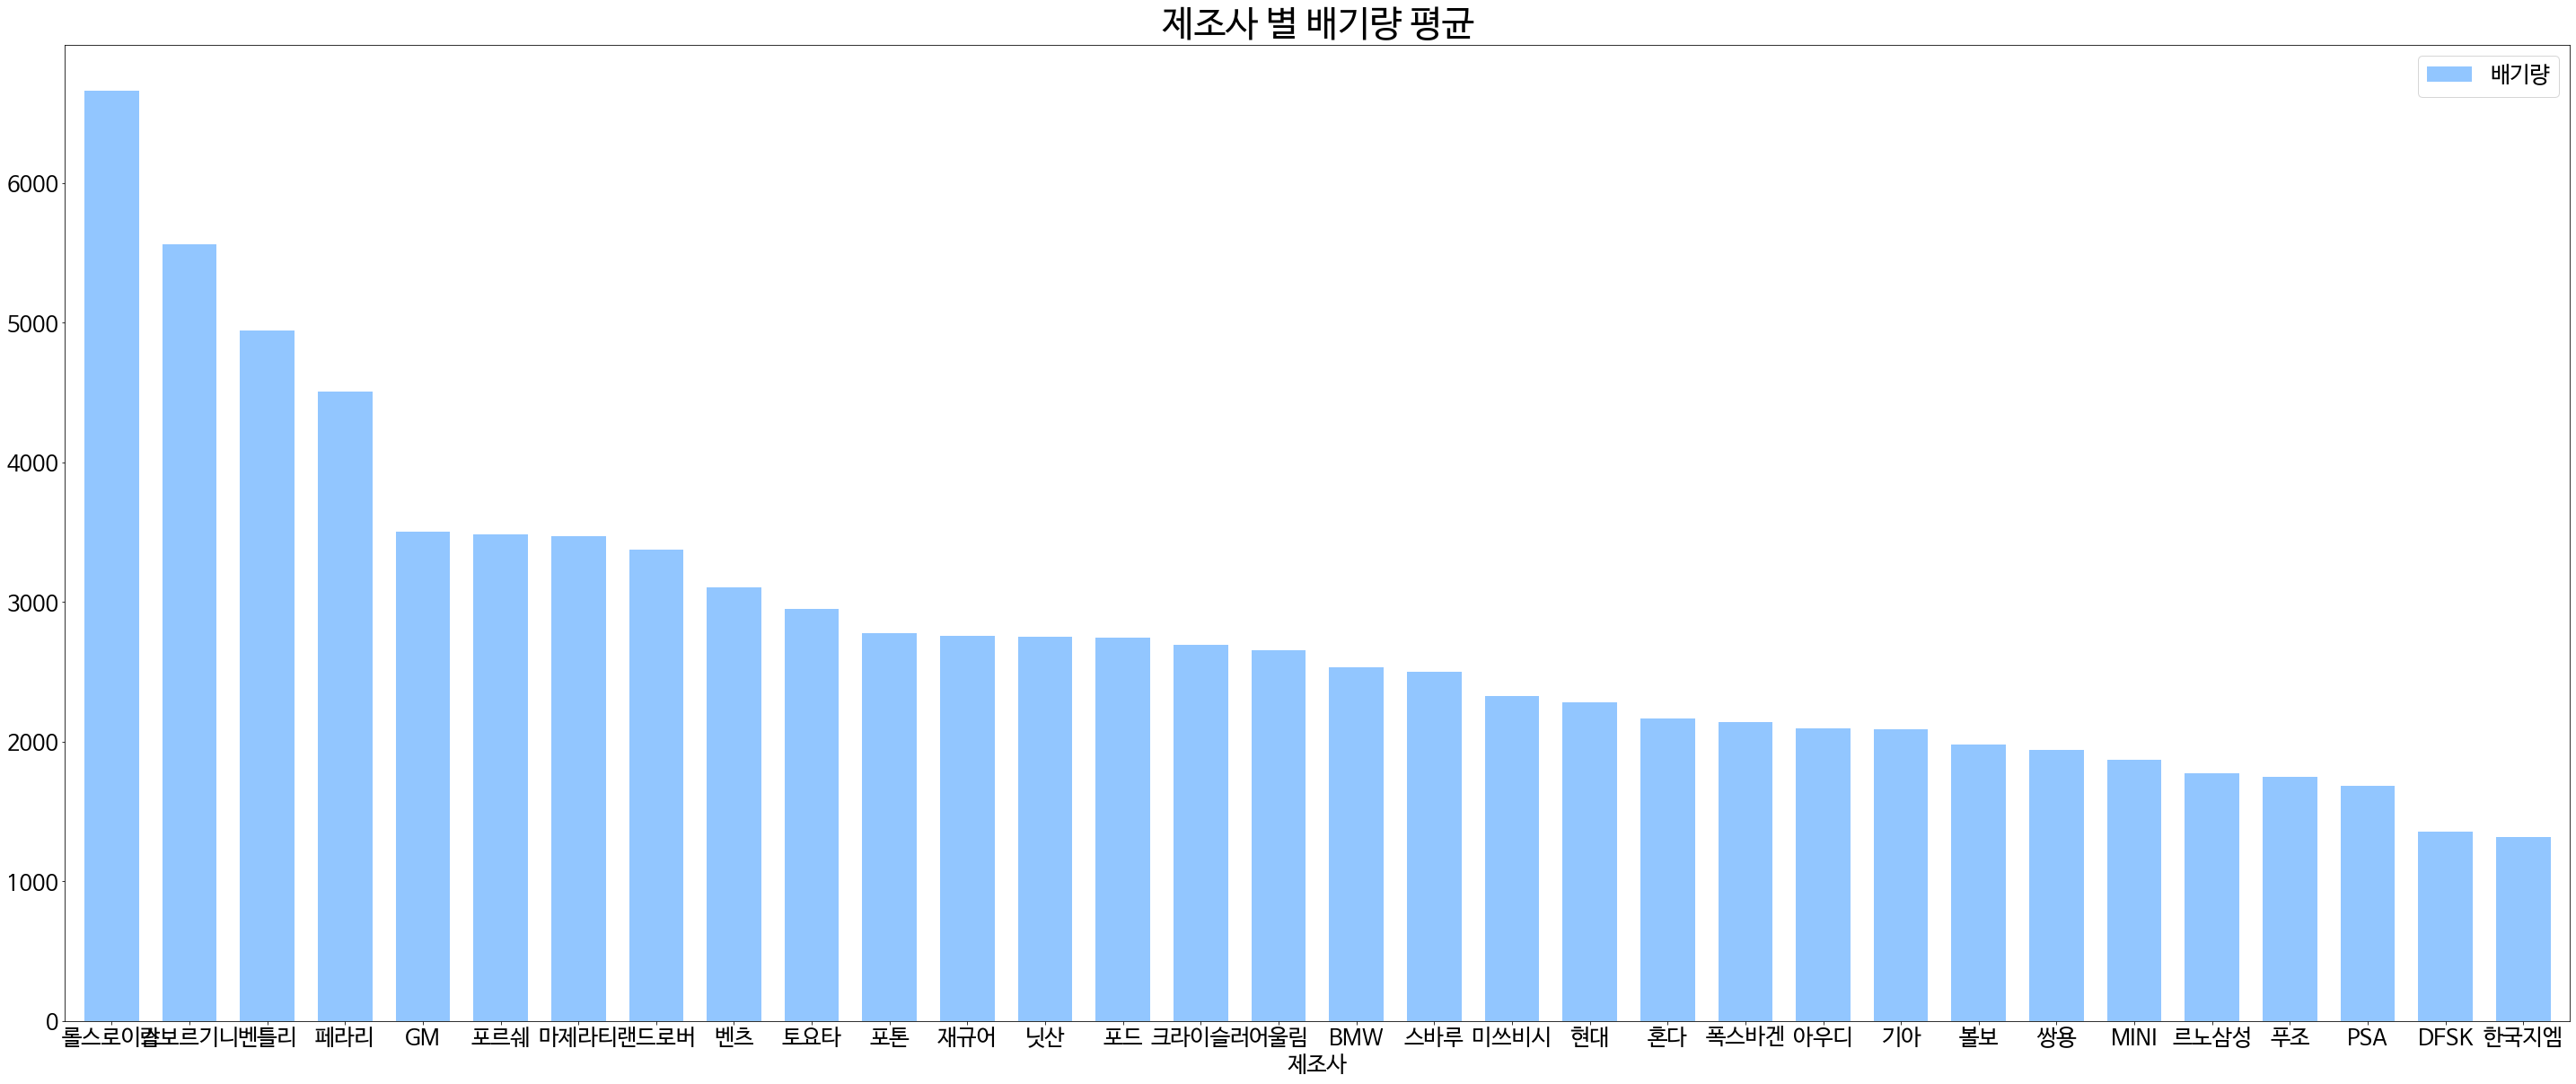

In [91]:
# 막대그래프로 시각화
cc1.plot( kind = 'bar', figsize = ( 50, 20 ), width = 0.7 )
plt.title( '제조사 별 배기량 평균', size = 40 )
plt.xticks( rotation = 'horizontal' )
plt.show()

In [48]:
# 가장 높은 10 곳들만 뽑아 새로운 데이터 프레임 생성
cc2 = cc.head( 10 )
cc2

,배기량
제조사,
롤스로이스,6659.29
람보르기니,5564.73
벤틀리,4942.58
페라리,4509.50
GM,3505.11
포르쉐,3484.60
마제라티,3471.42
랜드로버,3373.32
벤츠,3103.24


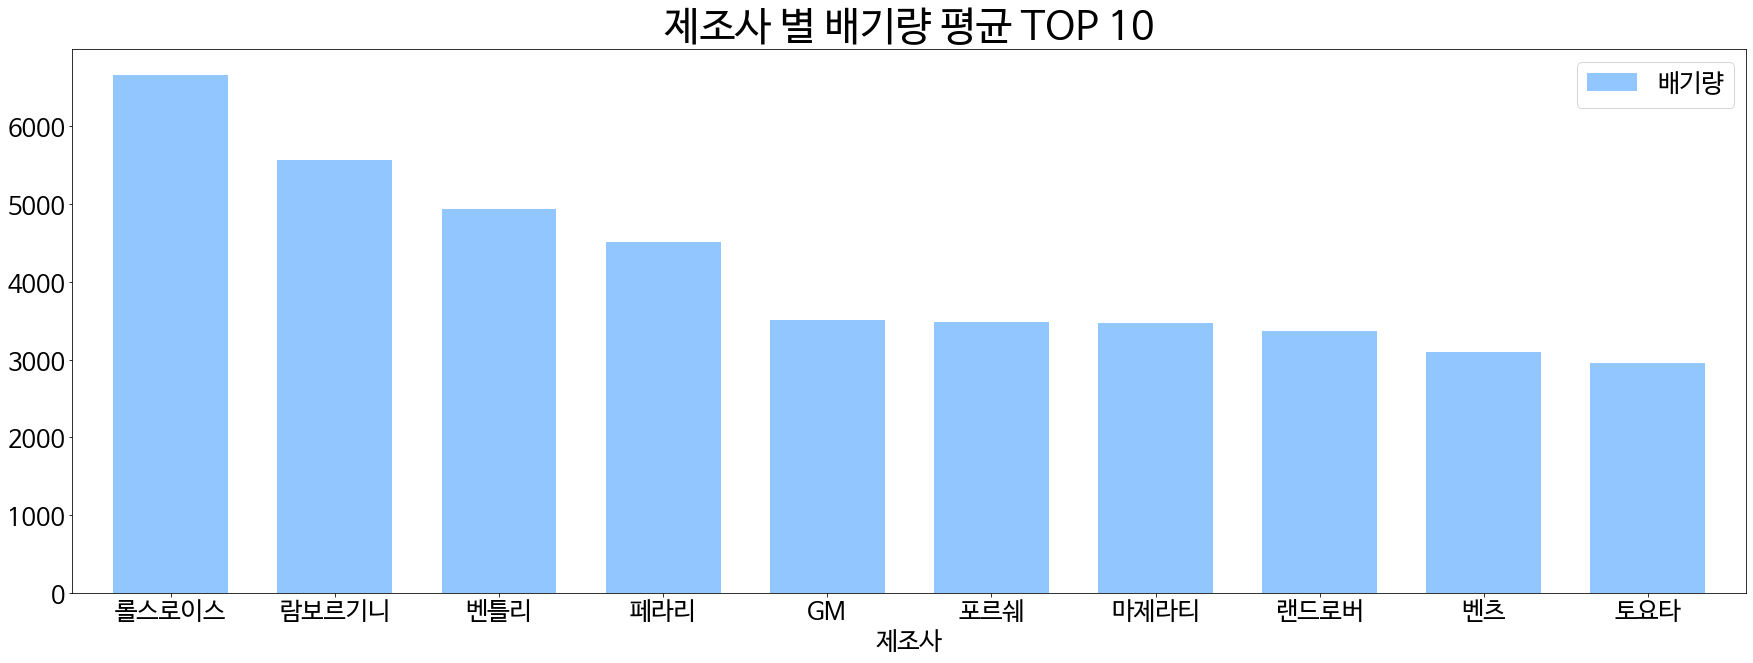

In [51]:
# 막대그래프로 시각화
cc2.plot( kind = 'bar', figsize = ( 30, 10 ), width = 0.7 )
plt.title( '제조사 별 배기량 평균 TOP 10', size = 40 )
plt.xticks( rotation = 'horizontal' )
plt.show()

외국 제조사의 자동차들이 배기량 평균이 높다는 걸 알 수 있었다.

#### 변속 형식 별 배기량 평균

In [96]:
df.변속형식.unique()

array(['무단변속', '자동6', '자동7', '자동8', '수동6', '자동9', '자동5', '자동4', '자동10',
       '수동5', '수동7', '없음'], dtype=object)

In [97]:
# 변속형식 별 배기량 평균을 나타내는 데이터프레임 생성( 소수점 둘째자리 까지 )
dcc = df.groupby( '변속형식' ).agg( { '배기량' : 'mean' } ).round( 2 )
dcc

,배기량
변속형식,
무단변속,2152.32
수동5,1204.26
수동6,2194.92
수동7,3618.00
없음,0.00
자동10,4068.00
자동4,1432.85
자동5,2657.59
자동6,2109.41


In [99]:
# 생성한 데이터프레임 내림차순으로 정렬
dcc = dcc.sort_values( by = [ '배기량' ], axis = 0, ascending = False )
dcc

,배기량
변속형식,
자동10,4068.00
수동7,3618.00
자동8,2929.59
자동7,2782.50
자동9,2690.63
자동5,2657.59
수동6,2194.92
무단변속,2152.32
자동6,2109.41


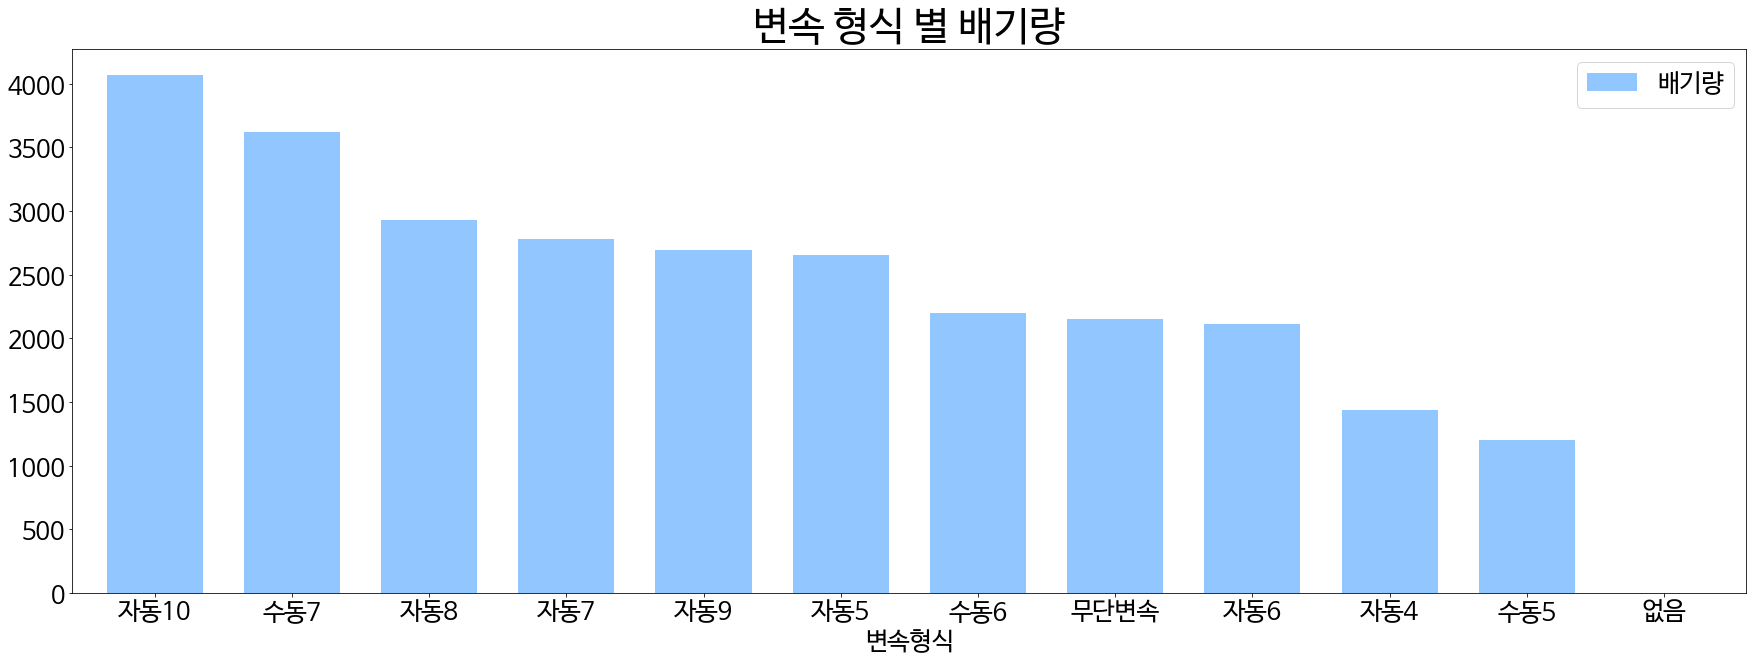

In [106]:
# 막대그래프로 시각화
dcc.plot( kind = 'bar', figsize = ( 30, 10 ), width = 0.7 )
plt.title( '변속 형식 별 배기량', size = 40 )
plt.xticks( rotation = 'horizontal' )
plt.show()

자동10 수동7 자동8 자동7 자동9 순으로 변속 형식 배기량이 차이난다.

#### 등급 별 배기량 평균

In [102]:
df.등급.unique()

array(['1등급', '2등급', '3등급', '4등급', '5등급', 'FCEV', 'PHEV', '경형', '고속',
       '저속'], dtype=object)

In [103]:
# 등급 별 배기량의 평균을 나타내는 데이터프레임 생성( 소수점 둘째자리 까지 )
rcc = df.groupby( '등급' ).agg( { '배기량' : 'mean' } ).round( 2 )
rcc

,배기량
등급,
1등급,1797.43
2등급,1881.05
3등급,2007.06
4등급,2375.02
5등급,3655.63
FCEV,0.00
PHEV,1953.48
경형,981.04
고속,0.00


In [104]:
# 생성한 데이터프레임 내림차순으로 정렬
rcc = rcc.sort_values( by = [ '배기량' ], axis = 0, ascending = False )
rcc

,배기량
등급,
5등급,3655.63
4등급,2375.02
3등급,2007.06
PHEV,1953.48
2등급,1881.05
1등급,1797.43
경형,981.04
FCEV,0.00
고속,0.00


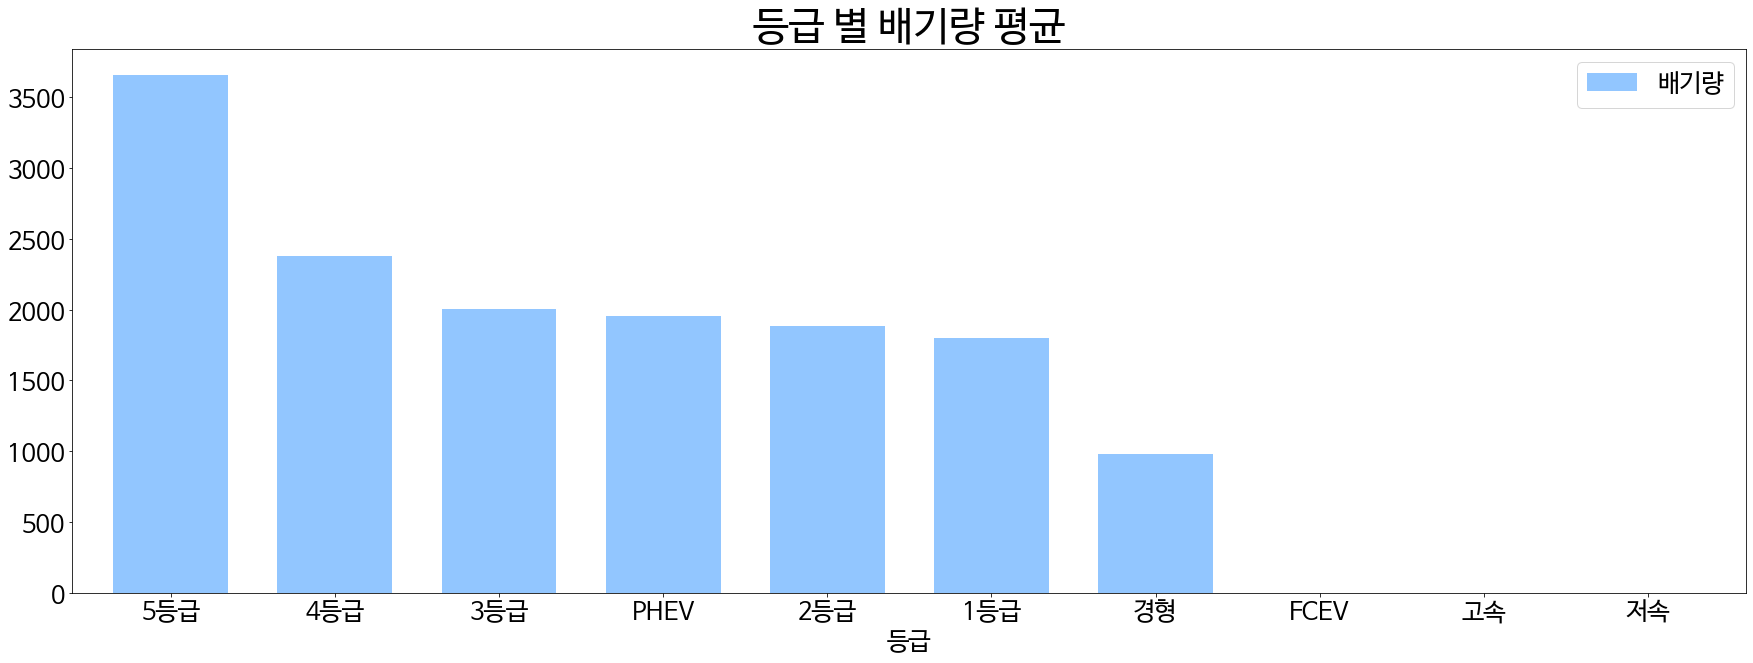

In [107]:
# 막대그래프로 시각화
rcc.plot( kind = 'bar', figsize = ( 30, 10 ), width = 0.7 )
plt.title( '등급 별 배기량 평균', size = 40 )
plt.xticks( rotation = 'horizontal' )
plt.show()

5등급이 가장 높은 배기량 평균을 가지고 있었다.

#### 배기량을 기준으로 한 자동차 분류 열 추가

In [175]:
df[ '분류' ] = 0
df.loc[ df[ '배기량' ] == 0, '분류' ] = '친환경차'
df.loc[ ( df[ '배기량' ] > 0 ) & ( df[ '배기량' ] < 1000 ), '분류' ] = '경차'
df.loc[ ( df[ '배기량' ] >= 1000 ) & ( df[ '배기량' ] < 1600 ), '분류' ] = '소형차'
df.loc[ ( df[ '배기량' ] >= 1600 ) & ( df[ '배기량' ] < 2000 ), '분류' ] = '중형차'
df.loc[ df[ '배기량' ] >= 2000, '분류' ] = '대형차'
df

,모델명,제조사,유종,배기량,변속형식,복합연비,등급,CO2배출량,분류
0,토요타 Prius AWD,토요타,휘발유,1798,무단변속,20.9,1등급,74.0,중형차
1,"코나 1.6GDI 하이브리드 (18"" 타이어)",현대,휘발유,1580,자동6,17.4,1등급,92.0,소형차
2,"코나 1.6GDI 하이브리드 (16"" 타이어)",현대,휘발유,1580,자동6,19.3,1등급,82.0,소형차
3,"코나 1.6디젤 2WD (16"" 타이어)",현대,경유,1598,자동7,17.5,1등급,105.0,소형차
4,"코나 1.6디젤 2WD (17"" 타이어)",현대,경유,1598,자동7,17.3,1등급,107.0,소형차
...,...,...,...,...,...,...,...,...,...
2082,넥쏘 수소전기차(19인치타이어),현대,수소,0,없음,93.7,FCEV,0.0,친환경차
2083,Danigo(다니고),대창모터스,전기,0,없음,5.3,저속,0.0,친환경차
2084,Change,AD 모터스,전기,0,없음,4.3,저속,0.0,친환경차
2085,코나 전기자동차 (도심형),현대,전기,0,없음,5.8,고속,0.0,친환경차


In [176]:
# 경차만 뽑아내기 
gyung = df[ df[ '분류' ] == '경차' ]
gyung

,모델명,제조사,유종,배기량,변속형식,복합연비,등급,CO2배출량,분류
392,"스토닉 1.0 T-GDI 7DCT (15""타이어)",기아,휘발유,998,자동7,13.7,3등급,121.0,경차
395,"스토닉 1.0 T-GDI 7DCT (17""타이어)",기아,휘발유,998,자동7,13.5,3등급,123.0,경차
1964,스파크 1.0,한국지엠,휘발유,999,무단변속,15.0,경형,109.0,경차
1965,스파크 1.0,한국지엠,휘발유,999,수동5,15.0,경형,109.0,경차
1966,스파크 밴 1.0,한국지엠,휘발유,999,무단변속,15.0,경형,109.0,경차
1967,스파크 밴 1.0,한국지엠,휘발유,999,수동5,15.0,경형,109.0,경차
1968,"레이 1.0가솔린 (PE, 15인치 타이어)",기아,휘발유,998,자동4,12.7,경형,130.0,경차
1969,"레이 1.0가솔린 밴형 (PE, 14인치 타이어)",기아,휘발유,998,자동4,13.0,경형,127.0,경차
1970,"레이 1.0가솔린 (PE, 14인치 타이어)",기아,휘발유,998,자동4,13.0,경형,127.0,경차
1971,레이 1.0LPI (PE),기아,LPG,998,자동4,10.5,경형,123.0,경차


In [193]:
# 경차로 분류되는 행만 뽑아 복합연비 순으로 내림차순 정렬한 데이터프레임 생성
gyung1 = gyung.sort_values( by = [ '복합연비'], axis = 0, ascending = False )
gyung1

,모델명,제조사,유종,배기량,변속형식,복합연비,등급,CO2배출량,분류
2010,모닝 1.0가솔린 (2015년형),기아,휘발유,998,수동5,16.2,경형,104.0,경차
2009,모닝 1.0가솔린 밴형 (2015년형),기아,휘발유,998,수동5,16.2,경형,104.0,경차
1988,모닝(JA) 1.0가솔린_밴형 (15),기아,휘발유,998,수동5,16.0,경형,101.0,경차
1991,모닝(JA) 1.0가솔린 (15),기아,휘발유,998,수동5,16.0,경형,101.0,경차
1985,모닝(JA) 1.0가솔린_밴형 (15),기아,휘발유,998,자동4,15.4,경형,106.0,경차
1992,모닝(JA) 1.0가솔린 (15),기아,휘발유,998,자동4,15.4,경형,106.0,경차
1995,스파크 1.0 CVT S&S,한국지엠,휘발유,999,무단변속,15.4,경형,107.0,경차
1993,모닝(JA) 1.0가솔린 (16인치 타이어) (15),기아,휘발유,998,수동5,15.3,경형,106.0,경차
1987,모닝(JA) 1.0가솔린_밴형 (16인치 타이어) (15),기아,휘발유,998,수동5,15.3,경형,106.0,경차
1999,스파크 1.0 MT,한국지엠,휘발유,999,수동5,15.2,경형,109.0,경차


In [194]:
# 생성한 데이터프레임 csv 파일로 내보내기
gyung1.to_csv( "경차.csv", encoding = "utf-16" )

In [179]:
# 소형차만 뽑아내기
so = df[ df[ '분류' ] == '소형차' ]
so

,모델명,제조사,유종,배기량,변속형식,복합연비,등급,CO2배출량,분류
1,"코나 1.6GDI 하이브리드 (18"" 타이어)",현대,휘발유,1580,자동6,17.4,1등급,92.0,소형차
2,"코나 1.6GDI 하이브리드 (16"" 타이어)",현대,휘발유,1580,자동6,19.3,1등급,82.0,소형차
3,"코나 1.6디젤 2WD (16"" 타이어)",현대,경유,1598,자동7,17.5,1등급,105.0,소형차
4,"코나 1.6디젤 2WD (17"" 타이어)",현대,경유,1598,자동7,17.3,1등급,107.0,소형차
5,"코나 1.6디젤 2WD (18"" 타이어)",현대,경유,1598,자동7,16.8,1등급,110.0,소형차
...,...,...,...,...,...,...,...,...,...
1957,니로(DE) 1.6GDI 플러그인 하이브리드_6DCT (15),기아,전기+휘발유,1580,자동6,18.6,PHEV,26.0,소형차
1958,아이오닉 1.6GDI 플러그인하이브리드_6DCT (15),현대,전기+휘발유,1580,자동6,20.5,PHEV,17.0,소형차
1959,BMW i8,BMW,전기+휘발유,1499,자동6,14.2,PHEV,42.0,소형차
1960,CHEVROLET VOLT,GM,전기+휘발유,1490,무단변속,17.8,PHEV,15.0,소형차


In [195]:
# 소형차로 분류되는 행만 뽑아 복합연비 순으로 내림차순 정렬한 데이터프레임 생성
so1 = so.sort_values( by = [ '복합연비'], axis = 0, ascending = False )
so1

,모델명,제조사,유종,배기량,변속형식,복합연비,등급,CO2배출량,분류
1939,아이오닉 1.6GDI 플러그인하이브리드 개조차_6DCT,현대,전기+휘발유,1580,자동6,28.3,PHEV,17.0,소형차
66,아이오닉 1.6GDI 하이브리드 6DCT_15''타이어,현대,휘발유,1580,자동6,22.4,1등급,69.0,소형차
1958,아이오닉 1.6GDI 플러그인하이브리드_6DCT (15),현대,전기+휘발유,1580,자동6,20.5,PHEV,17.0,소형차
65,아이오닉 1.6GDI 하이브리드 6DCT_17''타이어,현대,휘발유,1580,자동6,20.2,1등급,78.0,소형차
64,니로 1.6GDI 하이브리드_16''타이어 (15),기아,휘발유,1580,자동6,19.5,1등급,79.0,소형차
...,...,...,...,...,...,...,...,...,...
733,티볼리 가솔린 1.5 AT AWD 기준4,쌍용,휘발유,1497,자동6,10.2,4등급,164.0,소형차
884,K01H,DFSK,휘발유,1240,수동5,10.1,4등급,166.0,소형차
1177,티볼리 가솔린 AT AWD Long,쌍용,휘발유,1597,자동6,10.0,4등급,167.0,소형차
1084,KENBO 600,DFSK,휘발유,1498,무단변속,9.7,4등급,173.0,소형차


In [196]:
# 생성한 데이터프레임 csv 파일로 내보내기
so1.to_csv( "소형차.csv", encoding = "utf-16" )

In [182]:
# 중형차만 뽑아내기
joong = df[ df[ '분류' ] == '중형차' ]
joong

,모델명,제조사,유종,배기량,변속형식,복합연비,등급,CO2배출량,분류
0,토요타 Prius AWD,토요타,휘발유,1798,무단변속,20.9,1등급,74.0,중형차
7,쏘나타(DN8) 2.0GDI 하이브리드_17인치타이어,현대,휘발유,1999,자동6,19.1,1등급,83.0,중형차
8,쏘나타(DN8) 2.0GDI 하이브리드_17인치(빌트인캠),현대,휘발유,1999,자동6,18.8,1등급,85.0,중형차
9,쏘나타(DN8) 2.0GDI 하이브리드_16인치타이어,현대,휘발유,1999,자동6,20.1,1등급,79.0,중형차
10,쏘나타(DN8) 2.0GDI 하이브리드_16인치(빌트인캠),현대,휘발유,1999,자동6,19.8,1등급,80.0,중형차
...,...,...,...,...,...,...,...,...,...
1954,볼보 XC90T8 AWD,볼보,전기+휘발유,1969,자동8,9.5,PHEV,68.0,중형차
1955,토요타 Prius Prime,토요타,전기+휘발유,1798,무단변속,21.4,PHEV,23.0,중형차
1956,BMW X5 xDrive 40e iPerformance,BMW,전기+휘발유,1997,자동8,9.4,PHEV,89.8,중형차
1961,K5 2.0GDI 플러그인 하이브리드(15),기아,전기+휘발유,1999,자동6,16.4,PHEV,29.0,중형차


In [197]:
# 중형차로 분류되는 행만 뽑아 복합연비 순으로 내림차순 정렬한 데이터프레임 생성
joong1 = joong.sort_values( by = [ '복합연비'], axis = 0, ascending = False )
joong1

,모델명,제조사,유종,배기량,변속형식,복합연비,등급,CO2배출량,분류
15,토요타 Prius 2WD,토요타,휘발유,1798,무단변속,22.4,1등급,68.0,중형차
62,토요타 PRIUS,토요타,휘발유,1798,무단변속,21.9,1등급,71.0,중형차
1955,토요타 Prius Prime,토요타,전기+휘발유,1798,무단변속,21.4,PHEV,23.0,중형차
0,토요타 Prius AWD,토요타,휘발유,1798,무단변속,20.9,1등급,74.0,중형차
9,쏘나타(DN8) 2.0GDI 하이브리드_16인치타이어,현대,휘발유,1999,자동6,20.1,1등급,79.0,중형차
...,...,...,...,...,...,...,...,...,...
1726,"카렌스 2.0LPI 18""타이어(17MY) (15)",기아,LPG,1999,자동6,8.0,5등급,164.0,중형차
1558,레인지로버 이보크 2.0GTDi,랜드로버,휘발유,1999,자동9,7.8,5등급,219.0,중형차
1877,랜서 에볼루션,미쓰비시,휘발유,1998,자동6,7.6,5등급,235.0,중형차
1581,올란도 2.0 LPG 5인승,한국지엠,LPG,1998,자동6,7.2,5등급,184.0,중형차


In [198]:
# 생성한 데이터프레임 csv 파일로 내보내기
joong1.to_csv( "중형차.csv", encoding = "utf-16" )

In [185]:
# 대형차만 뽑아내기
dae = df[ df[ '분류' ] == '대형차' ]
dae

,모델명,제조사,유종,배기량,변속형식,복합연비,등급,CO2배출량,분류
6,"K7 2.4하이브리드 (PE/17""타이어)",기아,휘발유,2359,자동6,16.2,1등급,97.0,대형차
17,토요타 Camry Hybrid LE,토요타,휘발유,2487,무단변속,17.5,1등급,92.0,대형차
23,토요타 Avalon Hybrid,토요타,휘발유,2487,무단변속,16.6,1등급,96.0,대형차
24,렉서스 ES300h,토요타,휘발유,2487,무단변속,17.0,1등급,93.0,대형차
39,토요타 CAMRY Hybrid,토요타,휘발유,2494,무단변속,16.4,1등급,102.0,대형차
...,...,...,...,...,...,...,...,...,...
1931,Gallardo LP560-4,람보르기니,휘발유,5204,자동6,6.5,5등급,359.0,대형차
1932,인피니티 FX35,닛산,휘발유,3498,자동7,7.9,5등급,297.0,대형차
1936,BMW 745Le iPerformance,BMW,전기+휘발유,2998,자동8,14.2,PHEV,63.0,대형차
1938,BMW 745e iPerformance,BMW,전기+휘발유,2998,자동8,14.2,PHEV,63.0,대형차


In [199]:
# 대형차로 분류되는 행만 뽑아 복합연비 순으로 내림차순 정렬한 데이터프레임 생성
dae1 = dae.sort_values( by = [ '복합연비'], axis = 0, ascending = False )
dae1

,모델명,제조사,유종,배기량,변속형식,복합연비,등급,CO2배출량,분류
53,토요타 CAMRY Hybrid LE,토요타,휘발유,2494,무단변속,17.5,1등급,95.0,대형차
17,토요타 Camry Hybrid LE,토요타,휘발유,2487,무단변속,17.5,1등급,92.0,대형차
24,렉서스 ES300h,토요타,휘발유,2487,무단변속,17.0,1등급,93.0,대형차
52,토요타 Camry Hybrid,토요타,휘발유,2487,무단변속,16.7,1등급,95.0,대형차
23,토요타 Avalon Hybrid,토요타,휘발유,2487,무단변속,16.6,1등급,96.0,대형차
...,...,...,...,...,...,...,...,...,...
1918,Aventador LP700-4,람보르기니,휘발유,6498,자동7,4.5,5등급,522.0,대형차
1327,Aventador SVJ Coupe,람보르기니,휘발유,6498,자동7,4.5,5등급,398.0,대형차
1307,Aventador SVJ Roadster,람보르기니,휘발유,6498,자동7,4.4,5등급,405.0,대형차
1386,Aventador S Coupe,람보르기니,휘발유,6498,자동7,4.4,5등급,408.0,대형차


In [200]:
# 생성한 데이터프레임 csv 파일로 내보내기
dae1.to_csv( "대형차.csv", encoding = "utf-16" )